In [4]:
import numpy as np
import matplotlib.pyplot as plt

import mne

import glob
import os

### TO DO: 

make this notebook handle the pre and post data at once without manually setting the period each time
also different musician levels

### Set up 

In [49]:
#-----------------------------
#           PARAMETERS
#-----------------------------
evoked_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data'
epochs_dir = '/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data'

good_error_subjects = ['01', '04', '05', '06', '07', '08', '09', '10','11']
musicians = ['05', '06', '07', '08']
nonmusicians = ['01', '04', '09', '10','11']

subjects_to_process = nonmusicians
#some promising differences when including just musicians (subjects 5,6,7)


#### TO DO: take equal subsets from each participant?

In [50]:
#-----------------------------
#           GROUPING EVOKEDS
#-----------------------------

conditions = ['all', 'norm', 'shinv', 'inv']
evokeds = {cond: [] for cond in conditions}
epochs = {cond: {'pre': [], 'post': []} for cond in conditions}
periods = ['pre', 'post']
for subject in subjects_to_process:
    print('Processing subject:', subject)
    
    for cond in conditions:
        for period in periods:
            file_evoked = glob.glob(os.path.join(evoked_dir, f'error_ERP_{cond}_{period}_{subject}.fif'))[0]
            evoked = mne.read_evokeds(file_evoked)[0]
            evokeds[cond].append(evoked)
            
            file_epochs = glob.glob(os.path.join(epochs_dir, f'error_epochs_{cond}_{period}_{subject}.fif'))[0]
            epochs[cond][period].append(mne.read_epochs(file_epochs))

# Combine Evokeds
evokeds_ga = {cond: mne.combine_evoked(evokeds[cond], weights='equal') for cond in conditions}

# Concatenate Epochs
concat_epochs = {cond: {period: mne.concatenate_epochs(epochs[cond][period]) for period in ['pre', 'post']} for cond in conditions}

# Combine Evokeds for Pre and Post Data
concat_evoked = {period: {cond: mne.combine_evoked(evokeds[cond], weights='equal') for cond in conditions} for period in ['pre', 'post']}


Processing subject: 01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 289 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
289 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_post_01.fif ...
    Found the data of interest:
        t =    -203.12 ...     

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
71 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_01.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms (2)
        0 CTF compensation matrices available
        nave = 96 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.296875, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_01.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
96 matching events found
No baseline correction applied
0 project

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_01.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/er

        0 CTF compensation matrices available
        nave = 367 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_04.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
367 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_04.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms (2)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_04.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_04.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms (2)
        0 CTF compensation matrices available
        nave = 191 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.296875, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_04.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
191 matching events found
No baseline correction applied
0 projectio

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_inv_post_04.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_inv_post_04.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

        nave = 95 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.296875, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_pre_09.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
95 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_09.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms (2)
        0 CTF compensation matrices available
        nave = 95 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.296875, 0] s)
Reading /Users/

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_pre_09.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_09.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/err

Not setting metadata
251 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_10.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms (2)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.296875, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_pre_10.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
79 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_norm_pre_10.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_norm_pre_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_

        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
Processing subject: 11
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms (2)
        0 CTF compensation matrices available
        nave = 403 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.203125, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_11.fif ...
    Found the data of interest:
        t =    -203.12 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
403 matching events found
No baseline correction applied
0 projection items ac

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_all_pre_11.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_all_pre_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ER

Not setting metadata
96 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_11.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms (2)
        0 CTF compensation matrices available
        nave = 101 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.
Loaded Evoked data is baseline-corrected (baseline: [-0.296875, 0] s)
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_11.fif ...
    Found the data of interest:
        t =    -296.88 ...     703.12 ms
        0 CTF compensation matrices available
Not setting metadata
101 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/erro

/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_ERP_data/error_ERP_shinv_post_11.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked = mne.read_evokeds(file_evoked)[0]
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:19: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data/error_epochs_shinv_post_11.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs[cond][period].append(mne.read_epochs(file_epochs))
/var/folders/18/hp_602x50x34x_4p_qjc80g40000gn/T/ipykernel_91190/2656426847.py:15: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/er

Not setting metadata
1848 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
411 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
485 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
372 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
439 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
779 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
925 matching events found
Applying baseline correction (mode: mean)


### Plot grand average

In [51]:
concat_evoked

{'pre': {'all': <Evoked | '0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2' (average, N=3186.689777527131), -0.20312 – 0.5 s, baseline -0.203125 – 0 s, 64 ch, ~125 kB>,
  'norm': <Evoked | '0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2' (average, N=846.6291241112524), -0.29688 – 0.70312 s, baseline -0.296875 – 0 s, 64 ch, ~144 kB>,
  'shinv': <Evoked | '0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2' (average, N=752.3583851810505), -0.29688 – 0.70312 s, baseline -0.296875 – 0 s, 64 ch, ~144 kB>,
  'inv': <Evoked | '0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2 + 0.100 × 2' (average, N=1585.0753840255022), -0.29688 – 0.70312 s, baseline -0.296875 – 0 s, 64 ch, ~144 kB>},
 'post': {'all': <Evoked | '0.100 × 2 + 0.100 × 

No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


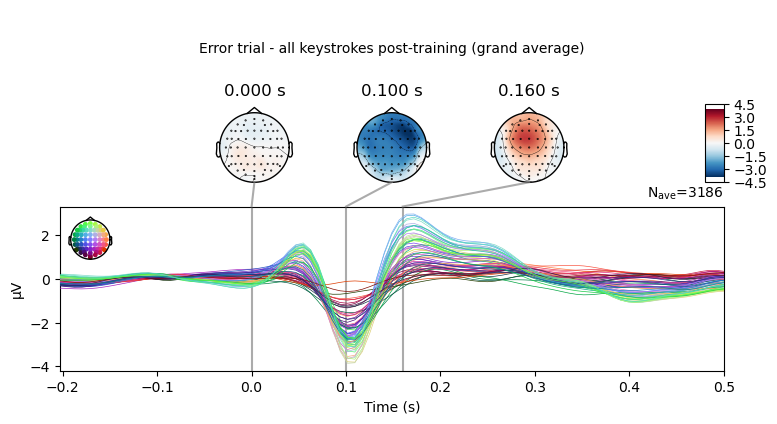

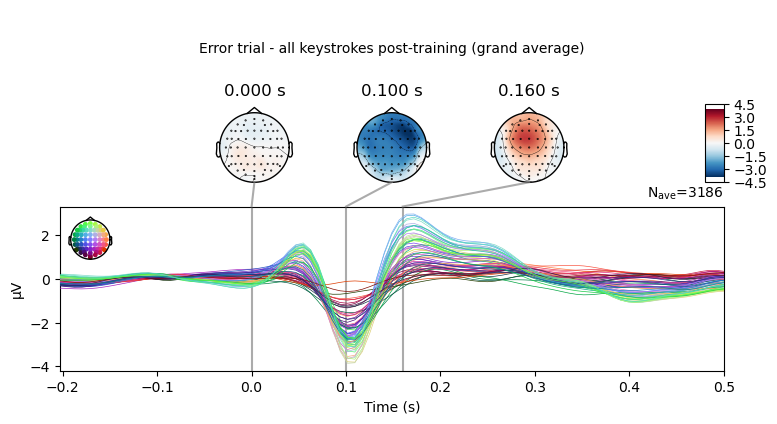

In [52]:
concat_evoked['pre']['all'].plot_joint(times =[ 0, 0.1, 0.16], title= f'Error trial - all keystrokes {period}-training (grand average)')

combining channels using "mean"
combining channels using "mean"


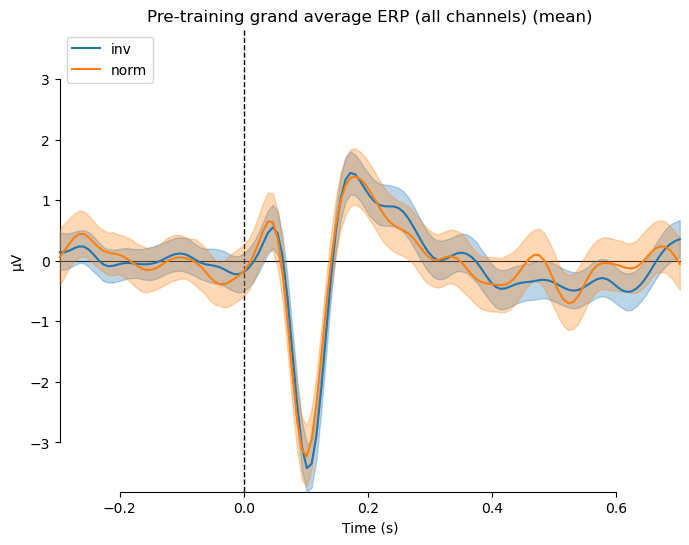

[<Figure size 800x600 with 1 Axes>]

In [53]:
erp_pre = dict(
        inv=list(concat_epochs['inv']['pre'].iter_evoked()),
        #shinv=list(concat_epochs['shinv']['pre'].iter_evoked()),
        norm=list(concat_epochs['norm']['pre'].iter_evoked())
       )
mne.viz.plot_compare_evokeds(erp_pre, title = 'Pre-training grand average ERP (all channels)',combine = 'mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


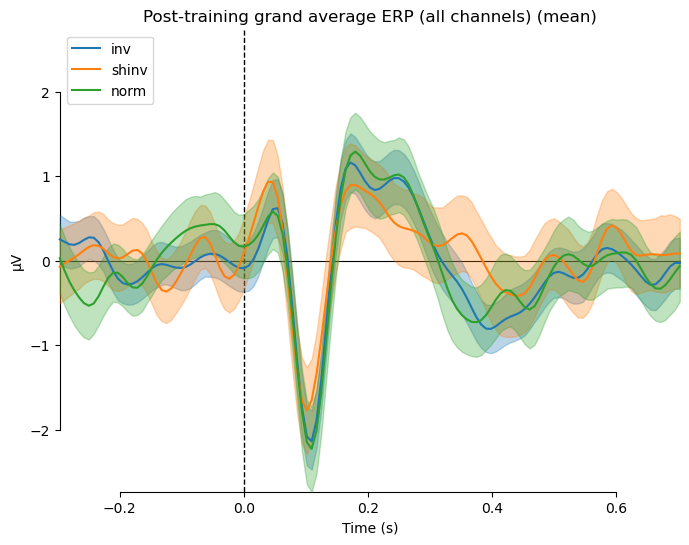

[<Figure size 800x600 with 1 Axes>]

In [54]:
erp_post = dict(
        inv=list(concat_epochs['inv']['post'].iter_evoked()),
        shinv=list(concat_epochs['shinv']['post'].iter_evoked()),
        norm=list(concat_epochs['norm']['post'].iter_evoked())
       )
mne.viz.plot_compare_evokeds(erp_post, title = 'Post-training grand average ERP (all channels)',combine = 'mean')